In [4]:
from datapackage import Package

In [5]:
package = Package('https://datahub.io/core/population/datapackage.json')

In [6]:
for resource in package.resource_names:
    print(resource)

validation_report
population_csv
population_json
population_zip
population_csv_preview
population


In [7]:
population_resource = package.get_resource('population_csv') 

In [8]:
population_data = population_resource.read()

In [10]:
import pandas as pd
df = pd.DataFrame(population_data)

In [11]:
df.columns = ['country_name', 'country_code', 'year', 'population']
df.head()

,country_name,country_code,year,population
0,Arab World,ARB,1960,92490932
1,Arab World,ARB,1961,95044497
2,Arab World,ARB,1962,97682294
3,Arab World,ARB,1963,100411076
4,Arab World,ARB,1964,103239902


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14885 entries, 0 to 14884
Data columns (total 4 columns):
country_name    14885 non-null object
country_code    14885 non-null object
year            14885 non-null int64
population      14885 non-null object
dtypes: int64(1), object(3)
memory usage: 465.2+ KB


In [14]:
df['population'] = pd.to_numeric(df['population'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14885 entries, 0 to 14884
Data columns (total 4 columns):
country_name    14885 non-null object
country_code    14885 non-null object
year            14885 non-null int64
population      14885 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 465.2+ KB


In [15]:
print(df['country_name'].unique())

['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)' 'Middle income'
 'North America' 'OECD members' 'Other sma

In [19]:
df_globally = df[df['country_name'] == 'World']
df_globally.head()

,country_name,country_code,year,population
2565,World,WLD,1960,3.034193e+09
2566,World,WLD,1961,3.075115e+09
2567,World,WLD,1962,3.127961e+09
2568,World,WLD,1963,3.192794e+09
2569,World,WLD,1964,3.258201e+09


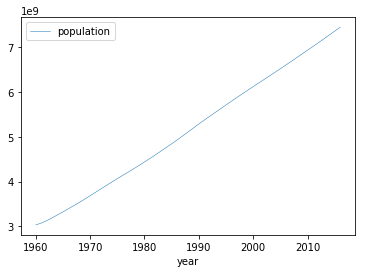

In [24]:
import matplotlib.pyplot as plt
ax = plt.gca()
df_globally.plot(subplots=True, kind='line', x='year', y='population', ax=ax, linewidth=0.5)
# plt.show()
plt.savefig('population_growth_globally.png', bbox_inches='tight')